<a href="https://colab.research.google.com/github/MartinezAddiego/GU-NSCI526-Tutorials/blob/main/NSCI_526_Tutorial_(Intro_to_Deep_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Deep Learning Tutorial
#### Flo Martinez Addiego, Georgetown University (NSCI 526)

Modified code for Kaggle challenge from [RUCHIBAHL18](https://www.kaggle.com/ruchibahl18/cats-vs-dogs-basic-cnn-tutorial/notebook).


## Before we get into the nitty-gritty, let's start off defining what "deep learning" is...

> "When you hear the term deep learning, just think of a **large deep neural net**. Deep refers to the number of layers typically and so this kind of the popular term that’s been adopted in the press . . ." -- Jeff Dean, Google

## Review:

What is the **goal** of creating our model? Simply, we want to be able to accurately match inputs to outputs. 
If we could just go from a particular input to an output without anything in between, this would be boring: there's no learning going on here. So, when we want learning to occur, we can use hidden layers.

### Recall: artificial neural networks--

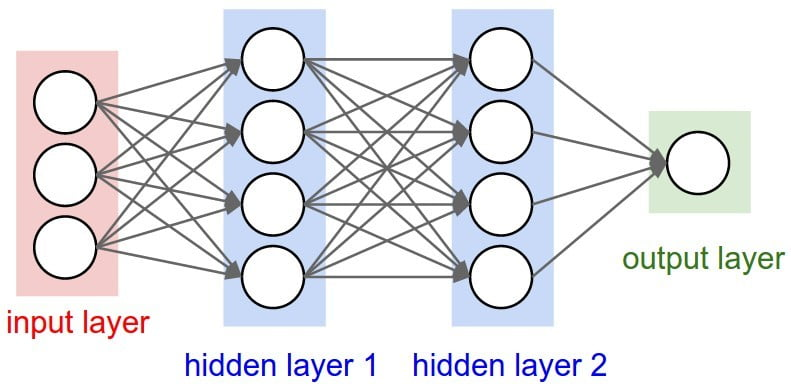

*   Typically organized into three main layers: (1) the input layer, (2) the hidden layer, and (3) the output layer.
*   Circles represent "neurons"; lines represent "synapses"; synapses will multiply the inputs and weights. Weights = strength of connection between neurons

As we can see in the image above, what's going to happen is each input data is first going to be assigned a unique weight and then will be connected to a neuron in a hidden layer. 

The data will come in, be summed, multiplied, and then finally an activation function will simulate whether or not a neuron fires.

## So, why do we care about deep neural networks?

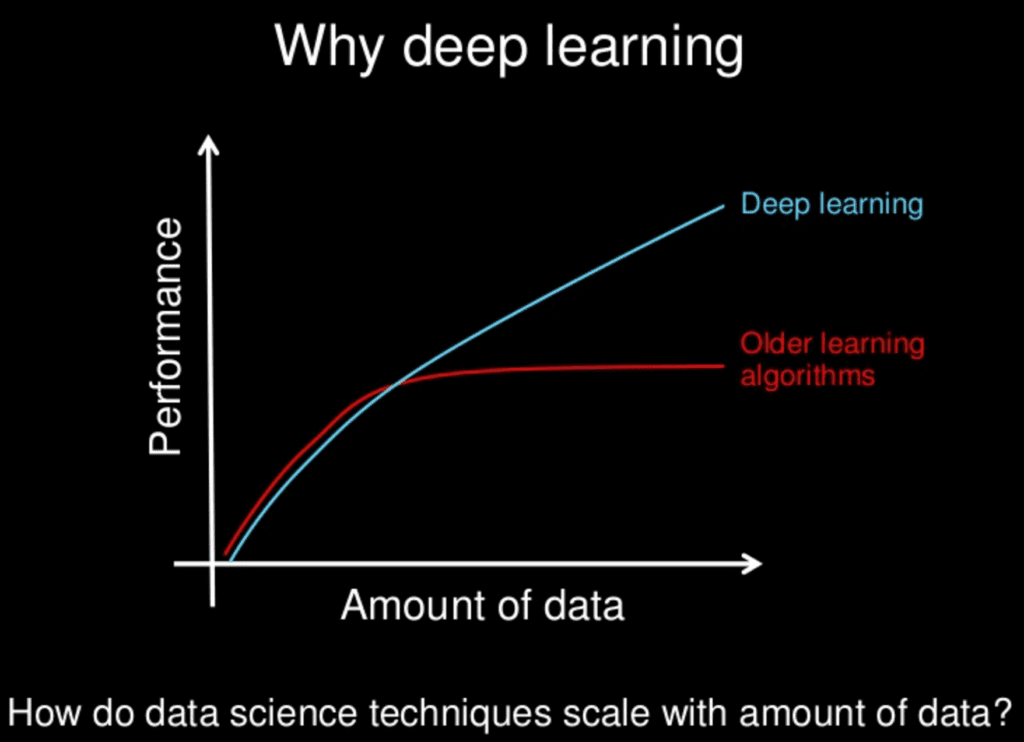

The problem: shallow neural nets cannot learn complex functions because of data limitations. In short, with depth and larger models, we can implement more data and get better results! Having more depth means there are more functions that can be represented, a network can learn better (and more), and the network can generalize to unseen data. Why do we care? What are the implications of generalization? (Hint: Think back to class...)

What's the downside? Way more computationally intensive.

**Notice that a deep neural network would then have inputs in hidden layers coming from either an x value or from another neuron.


##Our mission...should we choose to accept it...
###Kaggle Competition: Dogs vs. Cats (https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/overview)
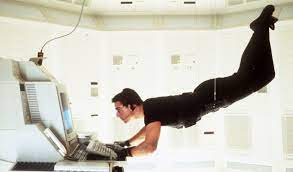

##A Brief Intro to Convolutional Neural Networks (CNNs)
A CNN is a type of artificial neural netowrk that is usually used for image/video applications. As its name suggests, it is made up of one or more convolutional layers. The way convoluational layers work is that they're going to apply a convolution operation to their input and then propogate that result through the network. A convulation will take all the pixels within a "receptive field" and compress them into a singular value. When we apply a sliding window to a convulational layer, we end up getting a vector or simplified matrix. That is, the result will be a singular value for each receptive field. 

CNNs use filters that will help determine what features (e.g. edges) are present in an image. 

By combining convolution layers with pooling layers, we end up with two very important properties:
1.   Localized attention
2.   Location invariance

If this at all sounds familiar, it should! CNNs are inspired by work done by neuroscientists and biologists (think: Hubel and Wiesel). 

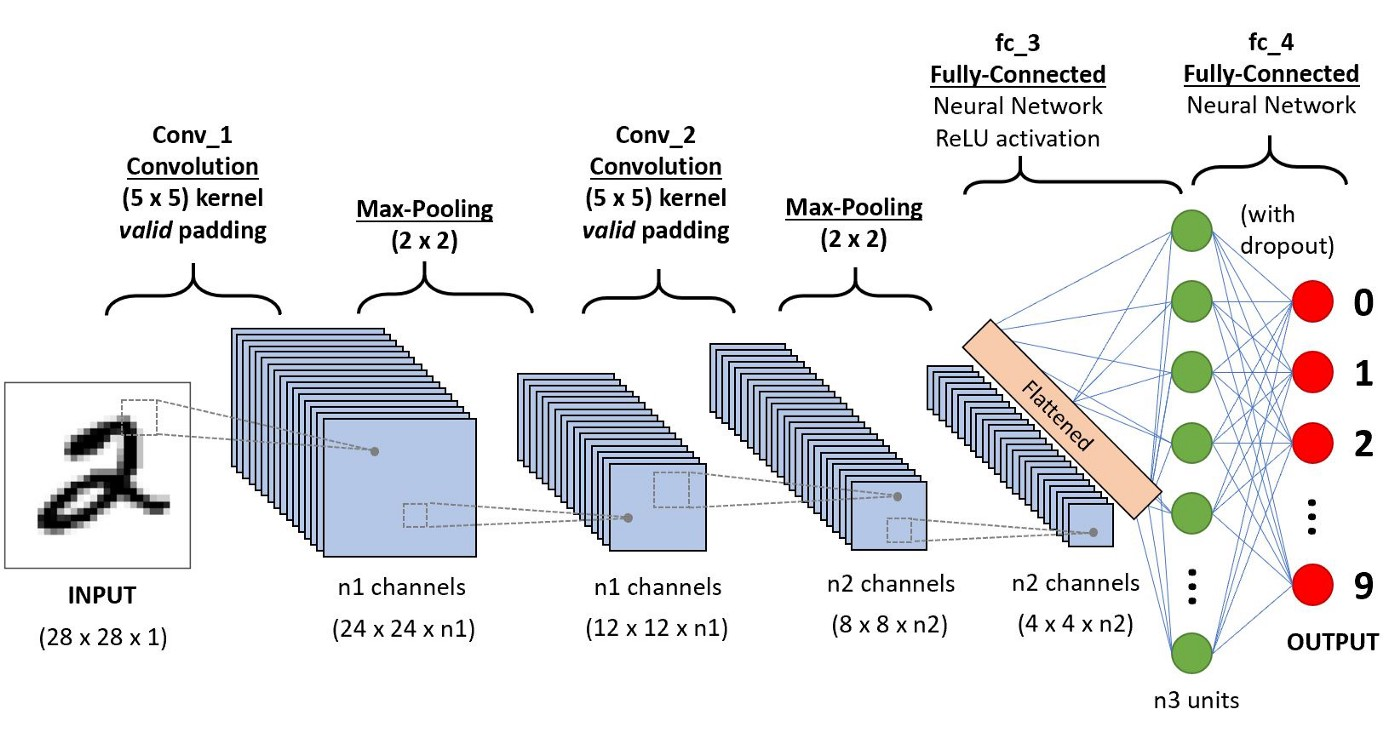

There are four main functions within a CNN:
1) Convolution
2) Non-linearity ReLU
3) Pooling
4) Classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Import our necessary libraries
import numpy as np #package used for scientific computing in python; allows us to perform different mathematical operations (helpful for linear algebra)
import matplotlib.pyplot as plt #allows us to create figures/plots
import cv2 #lets us load images and preprocess them (should hopefully make more sense later)
import os #allows us to interact with our operating system...we can create/remove/access folders
import pandas as pd #allows us to read/write data
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D


In [ ]:
from IPython import get_ipython

colab = 'google.colab' in str(get_ipython())

if colab:
  from google.colab import drive
  drive.mount('/content/drive')
  
  !cp /content/drive/MyDrive/dogs-cats-compNeuro/test.zip .
  !unzip test.zip

  !cp /content/drive/MyDrive/dogs-cats-compNeuro/train.zip .
  !unzip train.zip

train_dir = 'train'
test_dir = 'test'


Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

##Image Preprocessing

One of the steps we have to do before we can create and later train our deep neural network is image preprocessing. Within image preprocessng, we have to be sure to resize our images. We have no guarantee that our given folders will contain images of the same size, yet this is a requirement of many deep learning models. 

You will notice that the RGB vector values are going to be scaled to a range of 0 to 1. To do this, we will divide the values by 255. The training set and testing set data must be preprocessed the same way.

In [ ]:
#Image preprocessing code:
img_resizing = 75

##Our Training Loop
Now we need to store all our training data and their individual labels while also doing the actual preprocessing steps described above.

In [ ]:
#Create training loop

X = [] #array to store training data
y = [] #array to store categories for training data (e.g. dog or cat)

# In python, the lambda function is going to evaluate an expression for us. We have to provide both the argument and the expression
# Below, we are asking python to check if the category is dog and then convert it to an integer. 
convert = lambda category : int(category == 'dog')
#print(os.listdir(train_dir)) #quick check don't need anymore

def create_train_data(train_dir):
    for train_img in os.listdir(train_dir):
      #split the string by the period and then take the first element and pass it through our function convert above
        category = convert(train_img.split(".")[0])
        train_img_array = cv2.resize(cv2.imread(os.path.join(train_dir,train_img),cv2.IMREAD_GRAYSCALE),(img_resizing, img_resizing))
        #store the values in our pre-defined lists
        X.append(train_img_array)
        y.append(category)

create_train_data(train_dir)

X = np.array(X).reshape(-1, img_resizing, img_resizing,1)
y = np.array(y)

#Data normalization
X = X/255.0
#print(X) #quick check no longer needed

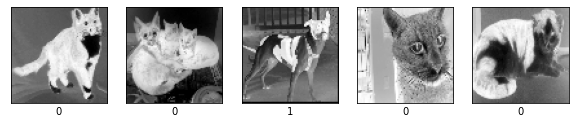

In [ ]:
#A quick sanity check...

plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i].reshape(img_resizing, img_resizing), cmap=plt.cm.binary)
    plt.xlabel(y[i])

In [ ]:
##Test data...

X_test = [] 
test_img_id = [] #will store actual ID of image
def create_test_data(test_dir):
    for test_img in os.listdir(test_dir):
        test_img_array = cv2.resize(cv2.imread(os.path.join(test_dir,test_img),cv2.IMREAD_GRAYSCALE),(img_resizing, img_resizing))
        X_test.append(test_img_array)
        test_img_id.append(test_img.split(".")[0])
    
create_test_data(test_dir)
X_test = np.array(X_test).reshape(-1,img_resizing,img_resizing,1)

#Data normalization
X_test = X_test/255

##Building the Actual Model

For this exercise, we will be using a **Sequential** model. Sequential is the easiest way to build a model within the Keras option imported at the beginning since we can go layer-by-layer and thus be specific. The "add()" function you will see below is what lets us add layers to our model!

We start off by adding a Convolutional layer. The Conv2D function performs a 2D convolution. In this case, the convolution is the dot product of the filter kernel and a portion of our input (recall the concept of the sliding window mentioned above). The values within the filter kernel are our weights...those are trained over time! Within the Conv2D function we specify the number of nodes for this layer and the size of our kernel.

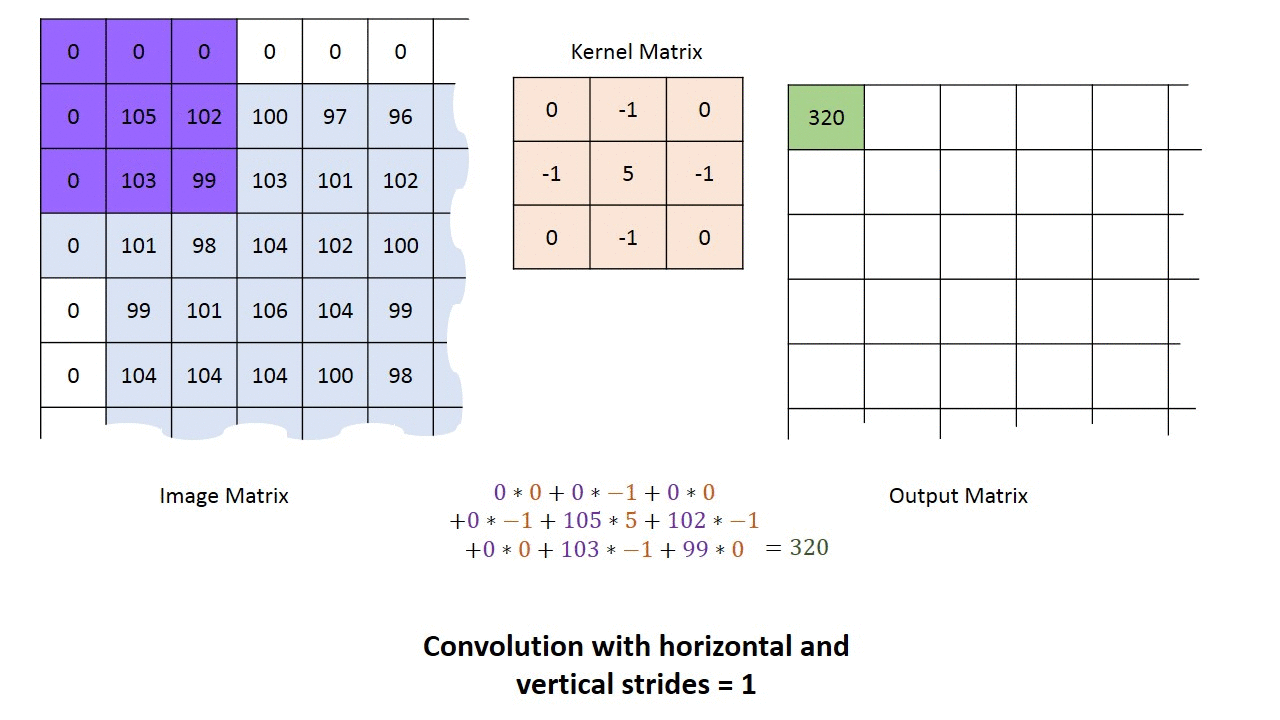

For our Conv2D function, we also have to specify what kind of activation function we want to use. In this case, we are choosing to use a Rectified Linear Activation (ReLU). The ReLU function will either return the value given or return 0 if the input is 0 or negative.

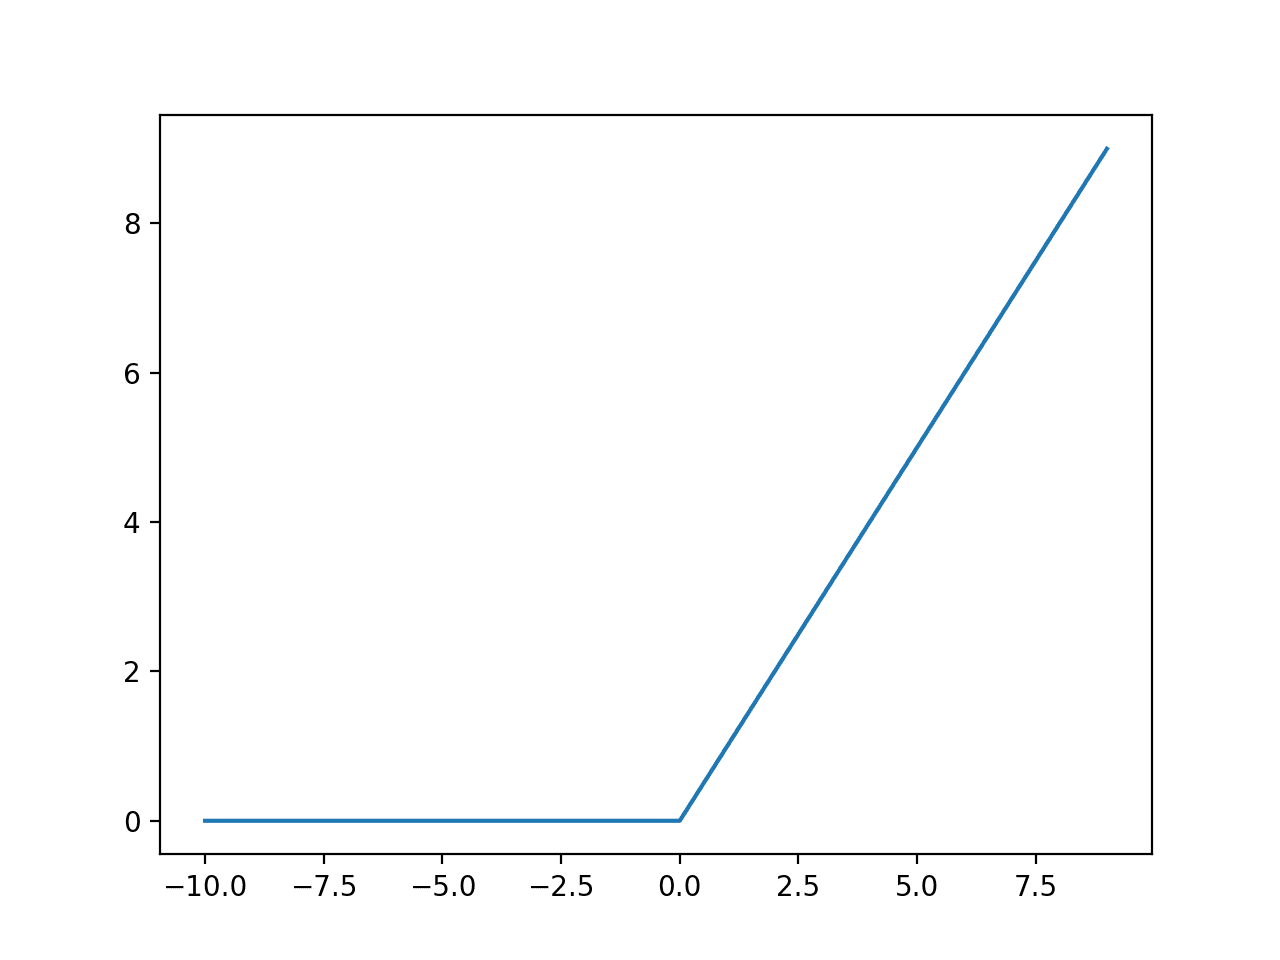

Following that, the model does MaxPooling:
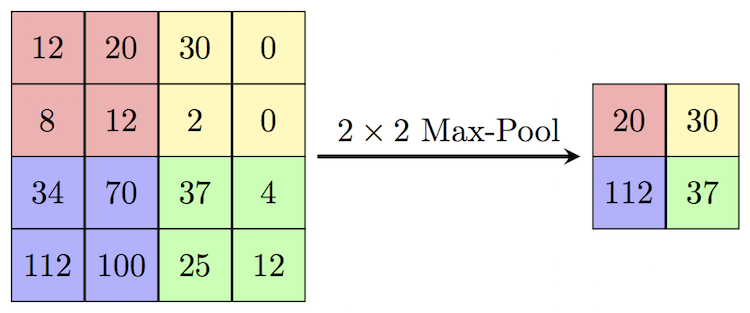

In between the Conv2D/pooling layers and the dense layer, there is a flatten layer. The flatten layer connects the previous layers to the dense layer.  

##Compiling the Model:

To compile the model, we take in three parameters (optimizer, loss, and metrics). 

The **optimizer** controls the learning rate of our model. The learning rate will determine how much to change the model in response to an error. Remember that our goal is to minimize loss...in other words, we want to get our prediction as close to the actual value as possible. If we make too big or too small of a change at each iteration, then that's not very helpful. In this case, we chose the Adam optimizer since it continuously adjusts learning rates throughout the training. 

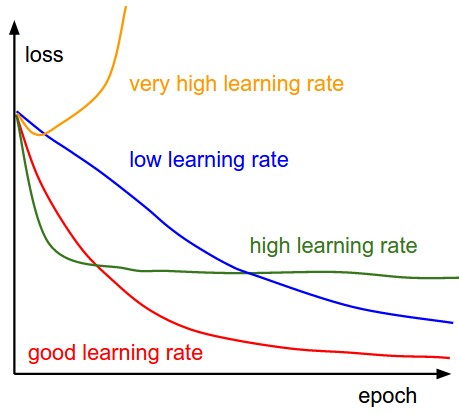

For the **loss function** we are using a 'binary cross entropy.' Binary cross entropy will compare the predicted values to the actual image label (0 or 1) and then give it a score based on how far off the predicted value is from the actual. We want to have as small a binary cross entropy as possible.

We are also looking at an 'accuracy' **metric** to keep tabs on the accuracy score on the validation set when training the model. 

In [ ]:
model = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
# Add another:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
# Add one more:
model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
# randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))

#model.add(Dense(64, activation='relu'))

# Add a sigmoid layer with one output unit:
# A sigmoid is a special case of the softmax operation. It will give two outputs but one of them has weights = 0, so output also = 0
#binary classification better choice: one output unit with sigmoid instead of softmax with two outputs b/c sigmoid updates faster.

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

##Time to run the model!
This is an example of supervised learning since we have the labels. So, our model.fit function will take both the training dataset as well as its labels. 

A singular (one) epoch is when the entire dataset is passed forward and backward through the neural network once. Because we cannot give the computer an entire epoch (imagine how many files that would be, yikes!), we divide our training set into a series of smaller batches. 

The validation_split allows us to choose a float between 0 and 1 that represents a fraction of the training data that will be used as validation data. (Note: it's still part of the training set not the testing set, which is why it's called validation). 

Our model will then *not* train on this portion of the data and will set it aside for the end to evaluate our performance.

In [ ]:
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 15s 22ms/step - loss: 0.6640 - accuracy: 0.5888 - val_loss: 0.6067 - val_accuracy: 0.6728
Epoch 2/10
625/625 [==============================] - 14s 22ms/step - loss: 0.5873 - accuracy: 0.6924 - val_loss: 0.5294 - val_accuracy: 0.7458
Epoch 3/10
625/625 [==============================] - 14s 22ms/step - loss: 0.5110 - accuracy: 0.7513 - val_loss: 0.4789 - val_accuracy: 0.7746
Epoch 4/10
625/625 [==============================] - 14s 22ms/step - loss: 0.4588 - accuracy: 0.7839 - val_loss: 0.4348 - val_accuracy: 0.8012
Epoch 5/10
625/625 [==============================] - 14s 22ms/step - loss: 0.4237 - accuracy: 0.8043 - val_loss: 0.4090 - val_accuracy: 0.8130
Epoch 6/10
625/625 [==============================] - 14s 22ms/step - loss: 0.4029 - accuracy: 0.8145 - val_loss: 0.3966 - val_accuracy: 0.8160
Epoch 7/10
625/625 [==============================] - 14s 22ms/step - loss: 0.3799 - accuracy: 0.8286 - val_loss: 0.3896 - val_accuracy:

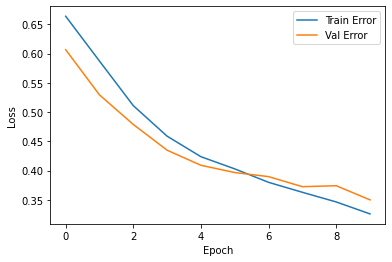

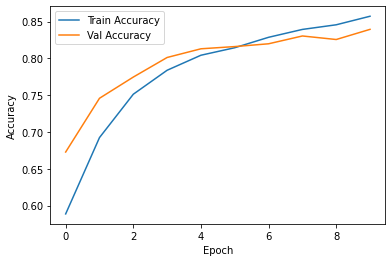

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

def plot_history_loss():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Error')
    plt.legend()
plot_history_loss()

def plot_history_acc():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Accuracy')
    plt.legend()
plot_history_acc()

In [ ]:
predictions = model.predict(X_test)
predicted_val = [int(round(p[0])) for p in predictions]
submission_df = pd.DataFrame({'image id':test_img_id, 'label':predicted_val})
#test_img_id
#submission_df.to_csv("submission.csv", index=False)

['9580',
 '10981',
 '12476',
 '8900',
 '5961',
 '4419',
 '10145',
 '11073',
 '2946',
 '9205',
 '6318',
 '4319',
 '10564',
 '9828',
 '6848',
 '5340',
 '7356',
 '360',
 '8270',
 '8848',
 '7243',
 '5955',
 '1984',
 '4505',
 '7394',
 '9549',
 '8903',
 '464',
 '6081',
 '4959',
 '8283',
 '2319',
 '7757',
 '10352',
 '6191',
 '8388',
 '4216',
 '6017',
 '8000',
 '189',
 '8002',
 '8105',
 '10620',
 '11497',
 '6239',
 '9197',
 '8373',
 '5495',
 '12499',
 '8732',
 '1526',
 '7517',
 '7511',
 '4807',
 '4143',
 '5536',
 '11932',
 '2046',
 '5317',
 '5431',
 '10387',
 '10554',
 '4678',
 '9800',
 '7379',
 '2509',
 '4412',
 '279',
 '4738',
 '1490',
 '3599',
 '4502',
 '11761',
 '1547',
 '7960',
 '2425',
 '4170',
 '5516',
 '1700',
 '3235',
 '5259',
 '4766',
 '5128',
 '9425',
 '9201',
 '6261',
 '3078',
 '5049',
 '6350',
 '5975',
 '2321',
 '3518',
 '517',
 '2615',
 '2306',
 '1862',
 '11402',
 '8131',
 '5111',
 '10642',
 '6819',
 '1912',
 '10500',
 '4078',
 '9480',
 '12053',
 '5721',
 '10433',
 '10945',
 '429

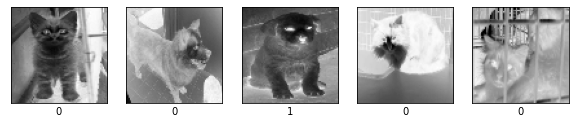

In [ ]:
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(img_resizing, img_resizing), cmap=plt.cm.binary)
    plt.xlabel(predicted_val[i])